## Chapter 2.1

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

#%matplotlib widget


no gdal


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
geo_model = gp.load_model('SandstoneGreenstone', path= '../data/gempy_models')

In [3]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id,value_0
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,1,2.61
0,SimpleMafic2,BIF_Series,1,False,#015482,2,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,3,3.1
2,SimpleMafic1,SimpleMafic_Series,1,False,#ffbe00,4,2.92
4,basement,Basement,1,True,#443988,5,2.61


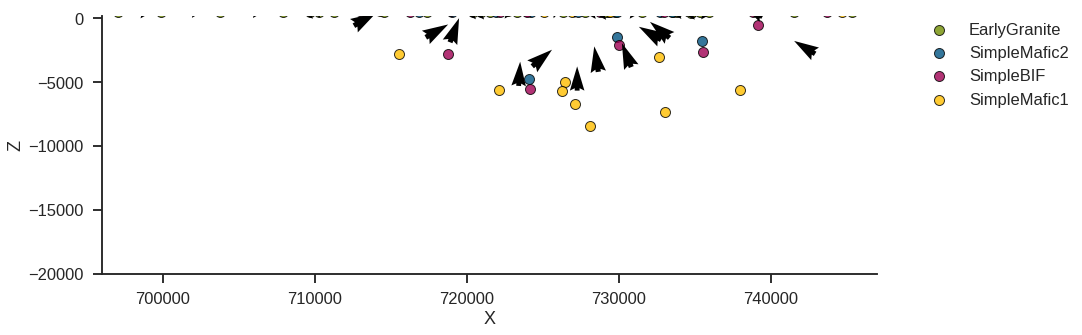

In [4]:
gp.plot.plot_data(geo_model)

In [5]:
# Compute normal model:
# gp.set_interpolation_data(geo_model,
#                           compile_theano=True,
#                           theano_optimizer='fast_compile',
#                           verbose=[])
# gp.compute_model(geo_model)

### Creating grid

First we need to define the location of the devices. For this example we can make a map:

In [6]:
grav_res = 20
X = np.linspace(7.050000e+05, 747000, grav_res)
Y = np.linspace(6863000, 6925000, grav_res)
Z= 300
xyz= np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(map(np.ravel, xyz)).T

In [7]:
geo_model.grid.set_gravity_grid()

In [8]:
geo_model.grid.gravity_grid.set_irregular_grid(xy_ravel,  resolution = [10, 10, 15], radio=5000)

In [9]:
geo_model.grid.gravity_grid.values.size

2323200

In [10]:
geo_model.grid.gravity_grid.set_tz_kernel();

### Compiling the gravity graph

In [11]:
geo_model.set_gravity_interpolator(pos_density=1)

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [12]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_run',
                          verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_run
device,cpu
verbosity,[]


In [13]:
grav = gp.compute_model(geo_model, output='gravity')

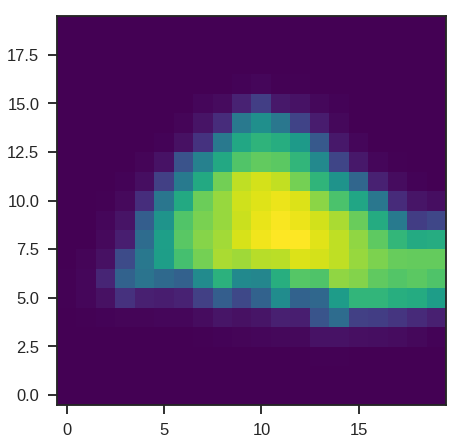

In [14]:
plt.imshow(grav.reshape(grav_res, grav_res), cmap='viridis_r', origin='bottom')